# <code><h2 style="color:#11B3EB;font-weight: bold; border:2px solid #11B3EB;"><center> Rapport sur le bonheur</center></h2></code>


# <code><div style="color: white;font-weight: bold;text-decoration: underline;font-size: 36px;"> Sommaire
  </div>
  <div >
    <ul style="color: white; font-size: 18px">
      <li><a style="color: white" href="#contexte">Contexte</a></li>
      <li><a style="color: white" href="#ACP">ACP</a></li>
      <li>
        <a style="color: white" href="#clustering">Clustering / Kmeans </a>
      </li>
      <li>
        <a style="color: white" href="#analyse"
          >Analyse selon les regions du monde</a
        >
      </li>
    </ul>
  </div>
</code>


---


<div style="font-size:18px">
  <h5 style="color: white; text-decoration: underline">Source :</h4>
  <ul>
    <li>
      <a style="color: white; text-decoration: none"href="https://fr.wikipedia.org/wiki/Rapport_mondial_sur_le_bonheur">Rapport_mondial_sur_le_bonheur : Wikipedia</a>
    </li>
    <li>
      <a style="color: white; text-decoration: none"href="https://drive.google.com/file/d/1rXaG5T0o-QYGnSZPw3NV-oC1D5Cjq2vF/view">Dataset 2019</a>
    </li>
    <li>
      <a style="color: white; text-decoration: none"href="https://en.wikipedia.org/wiki/Elbow_method_(clustering)">Elbow method</a>
    </li>
    <li>
      <a style="color: white; text-decoration: none"href="https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/">Elbow method</a>
    </li>
  </ul>
</div>


# <code><div id="contexte" style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center>Contexte du projet</center></div></code>


Dans cette étude de cas, nous formerons un algorithme d'apprentissage automatique **non supervisé** pour regrouper les pays en fonction de caractéristiques telles que la production économique, le soutien social, l'espérance de vie, la liberté, l'absence de corruption et la générosité.
Le Rapport sur le bonheur dans le monde détermine l'état du bonheur mondial. Les scores de bonheur et les données de classement ont été collectés en demandant aux individus de classer leur vie de 0 (la pire vie possible) à 10 (la meilleure vie possible).


# <code><div style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center>Imports</center></div><code>


In [1]:
# Load the Pandas libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler ,OneHotEncoder 
from sklearn.compose import make_column_transformer

In [2]:
# Load visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [3]:
# Load clustering libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [4]:
import warnings
warnings.filterwarnings('ignore')

# <code> <div style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center>Chargement de la dataframe</center></div> </code>


In [5]:
df = pd.read_csv('Data/datasets/Rapport-bonheur.csv', sep=",")


In [6]:
df.head()


,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe


# <code> <div id ="ACP" style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center>ACP</center></div> </code>


In [7]:
header = pd.DataFrame()
X = pd.DataFrame()

for col in df.columns:
    if col in ["Overall rank", "Country", "Region"]:
        header[col] = df[col]
    else:
        X[col] = df[col]

### <code> <div style="color:#F1D405 ;font-weight: bold; ;">Standardisation des données</div> </code>

In [8]:
s = StandardScaler()
data_scale = s.fit_transform(X)
data_scale

array([[ 2.13370122,  1.13458258,  1.32003701, ...,  1.44402663,
        -0.28520008,  3.00230761],
       [ 1.97842168,  1.2487937 ,  1.2688845 , ...,  1.4151102 ,
         0.74812832,  3.18186188],
       [ 1.93615624,  1.52768131,  1.30176825, ...,  1.49463038,
         0.94644387,  2.45308279],
       ...,
       [-1.94123824, -1.47102453, -1.8806483 , ...,  1.14763324,
         0.3828102 ,  3.19242389],
       [-2.03587606, -1.16026405, -1.24489574, ...,  0.15001644,
         0.99863217,  0.40405173],
       [-2.06160285, -1.49492919, -2.58947587, ..., -2.86452127,
        -0.23301177, -0.88451419]])

In [9]:
X = pd.DataFrame(data=data_scale, columns=X.columns)
X.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2.133701,1.134583,1.320037,1.090656,1.444027,-0.285200,3.002308
1,1.978422,1.248794,1.268885,1.133909,1.415110,0.748128,3.181862
2,1.936156,1.527681,1.301768,1.272318,1.494630,0.946444,2.453083
3,1.881027,1.240825,1.455226,1.263667,1.407881,1.812770,0.097753
4,1.875515,1.283323,1.082543,1.146885,1.162091,1.478765,1.998916


In [10]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)


In [11]:
pca_df = pd.DataFrame(data=components, columns=["PC1", "PC2", "PC3"])
pca_df.head()

,PC1,PC2,PC3
0,-3.833040,0.958214,1.908382
1,-3.923874,1.722396,1.462946
2,-3.953171,1.444189,0.788680
3,-3.269181,0.926943,-1.552648
4,-3.473673,1.594224,0.200169


<span> Transformation en label des régions avec onehotencoder</span>

In [12]:
pca_df_final = pd.concat([pca_df, header[["Country", "Region", "Overall rank"]]], axis=1)
transformer = make_column_transformer(
    (OneHotEncoder(), ['Region']),
    remainder='passthrough')

transformed = transformer.fit_transform(pca_df_final)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)
transformed_df.head()


,onehotencoder__x0_Central and Eastern Europe,onehotencoder__x0_Commonwealth of Independent States,onehotencoder__x0_East Asia,onehotencoder__x0_Latin America and Caribbean,onehotencoder__x0_Middle East and North Africa,onehotencoder__x0_North America and ANZ,onehotencoder__x0_South Asia,onehotencoder__x0_Southeast Asia,onehotencoder__x0_Sub-Saharan Africa,onehotencoder__x0_Western Europe,PC1,PC2,PC3,Country,Overall rank
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.83304,0.958214,1.908382,Finland,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.923874,1.722396,1.462946,Denmark,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.953171,1.444189,0.78868,Norway,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.269181,0.926943,-1.552648,Iceland,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.473673,1.594224,0.200169,Netherlands,5


In [13]:
px.scatter(pca_df_final, x="PC1", y="PC2", color="Overall rank",
           log_x=True, log_y=True, size="Overall rank",)


In [14]:
px.scatter_3d(pca_df_final, x="PC1", y="PC2", z="PC3",
              color="Country", size="Overall rank", title="PCA")


### <code> <div style="color:#F1D405 ;font-weight: bold; ;">ACP par régions</div> </code>


In [15]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Region'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'1': 'PC 1', '2': 'PC 2', '3': 'PC 3'}
)
fig.show()


In [16]:
px.scatter(df, x="Healthy life expectancy", y="Score",
           color="Region", size='Overall rank', hover_name="Country",)

# <code> <div id="clustering" style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center>Clustering / Kmeans</center></div> </code>


### <code> <div style="color:#F1D405 ;font-weight: bold; ;"> Methode Elbow </div> </code>


In [17]:
K = range(1, 10)

In [18]:
def define_n_clusters(n_cluster):
    distortions = []
    for n in n_cluster:
        model = KMeans(n_clusters=n, init='k-means++',
                    max_iter=20, n_init=10, random_state=42)
        model.fit(pca_df)
        distortions.append(model.inertia_)
        print(model.inertia_)
    return distortions

In [19]:
def plot_elbow_curve(d):
    fig = px.line(x=K, y= d, width=800, height=500)
    fig.update_traces(line=dict(width=4.5))
    fig.update_layout(

        title=dict(
            text='<b>Elbow curve</b>',
            x=0.5,
            y=0.95,
            font=dict(size=20)),
        xaxis_title="<b>n_clusters</b>",
        yaxis_title='<b>Inertia</b>',
        font=dict(size=12)
    )
    fig.show()

In [20]:
dist = define_n_clusters(K)
plot_elbow_curve(dist)

847.866004845134
473.7087492590729
290.4476706045767
238.1393278133836
193.02418839269112
169.84972717898444
153.04981905461062
139.71461508947695
129.6920086785146


<p> 
Le point d'inflexion de la courbe est à 3 , on peut donc supposer que le nombre de cluster optimaux est de 3 
Nous allons verifier cela avec les silhouettes

</p>


### <code> <div style="color:#F1D405 ;font-weight: bold; ;">Silhouette </div> </code>


For n_clusters = 2 The average silhouette_score is : 0.39313142488873287
For n_clusters = 3 The average silhouette_score is : 0.43388358437431335
For n_clusters = 4 The average silhouette_score is : 0.3490815285470986
For n_clusters = 5 The average silhouette_score is : 0.36835657147319206
For n_clusters = 6 The average silhouette_score is : 0.34004529483651785


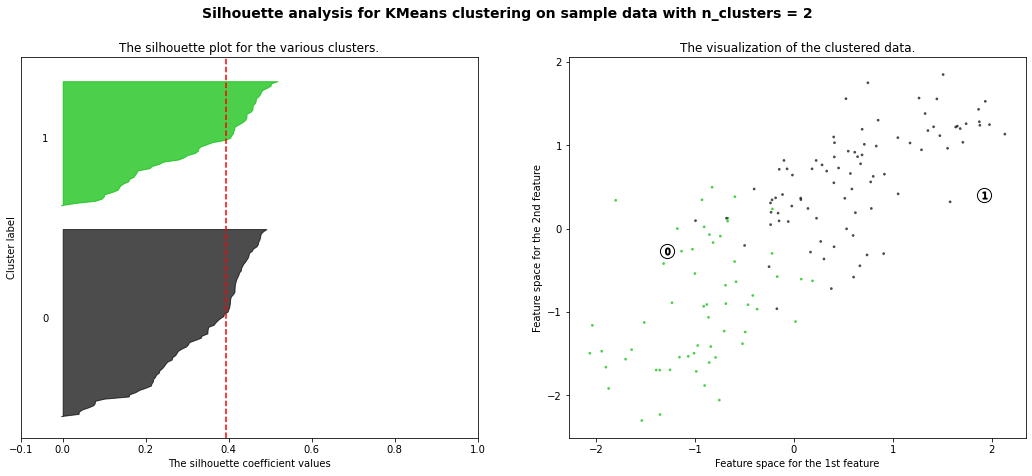

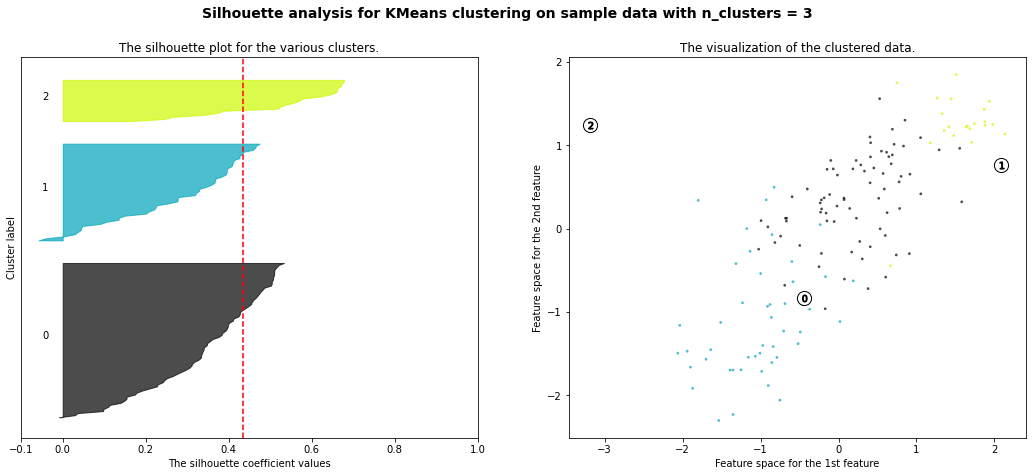

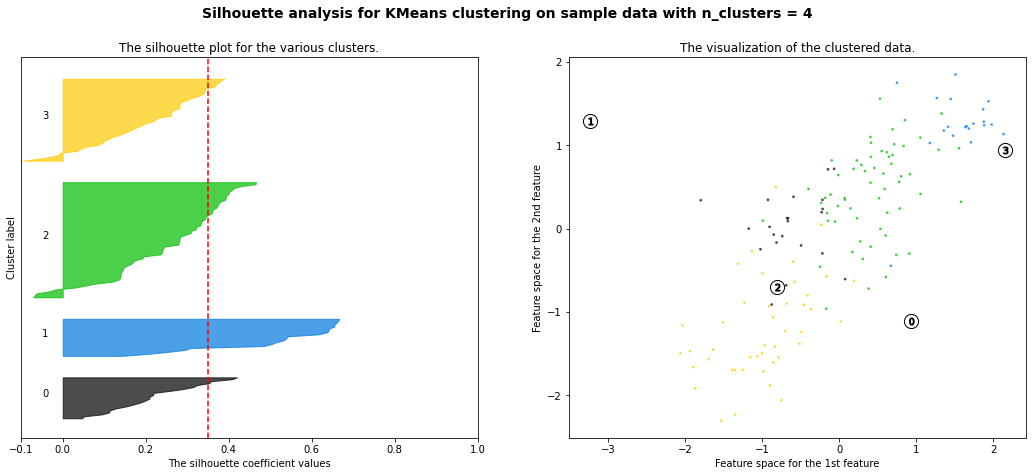

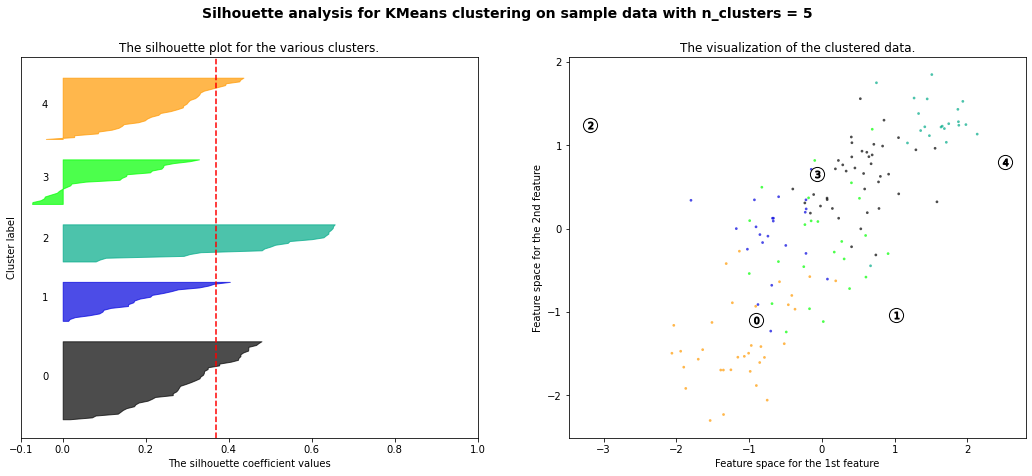

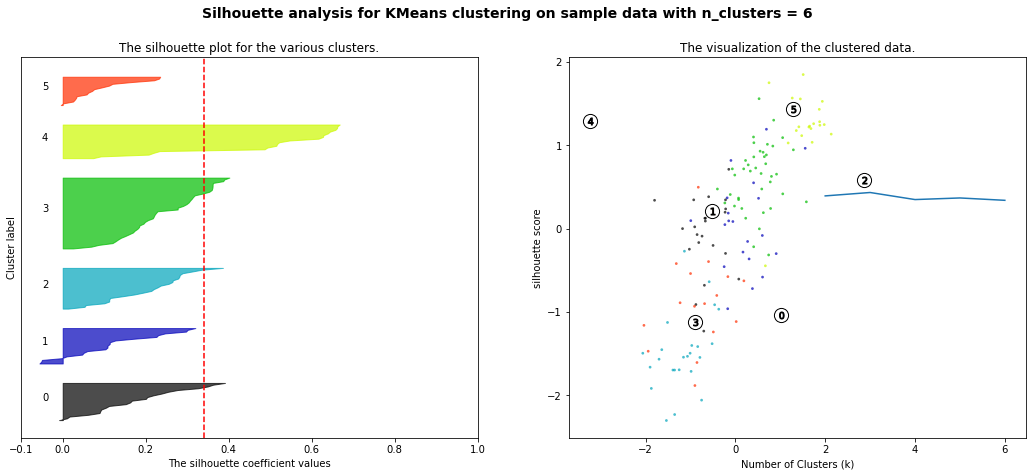

In [21]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(pca_df)

    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[::,0], X.iloc[::,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')




plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

<span> 

Le diagramme de silhouette  n_cluster de 2 semble un choix ok .

Pour n_clusters=3, toutes les parcelles sont plus ou moins d'épaisseur similaire et donc de tailles similaires, ce qui peut être considéré comme le meilleur 'k'.

Le diagramme n_clusters = 4 les cluster 0 et 1 on une épaisseur différente des cluster 2 et 3.

Le diagramme de silhouette montre que la valeur n_cluster de 5 est un mauvais choix, car tous les points du cluster avec cluster_label=1 et 3 sont des scores de silhouette inférieurs à la moyenne.

Le diagramme de silhouette montre que la valeur n_cluster de 6 est un mauvais choix, car tous les points du cluster avec cluster_label=1 et 5 sont des scores de silhouette inférieurs à la moyenne.


</span>

### <code> <div style="color:#F1D405 ;font-weight: bold; ;">Kmeans </div> </code>

In [22]:
def kmeans_cluster():
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(data_scale)
    predictKmeans = kmeans.predict(data_scale)
    centers = kmeans.cluster_centers_
    return predictKmeans , centers

In [23]:
y , centroid = kmeans_cluster()

### <code> <div style="color:#F1D405 ;font-weight: bold; ;">Clusters scatter plot 2d </div> </code>

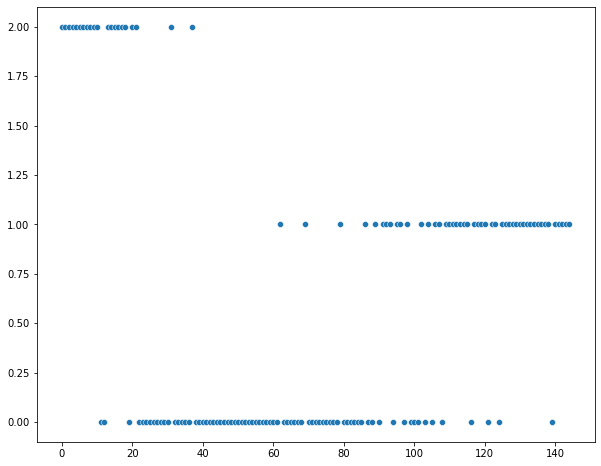

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=y)
plt.show()


### <code> <div style="color:#F1D405 ;font-weight: bold; ;">TSNE et visualisation par pays </div> </code>

In [25]:
def tsne(col):
    model = TSNE(n_components=3, random_state=0)
    tab = model.fit_transform(data_scale)
    bonheur = {}
    bonheur['axe1'] = tab[:,0]
    bonheur['axe2'] = tab[:,1]
    bonheur['axe3'] = tab[:,2]
    bonheur['label'] = y
    bonheur[col] = df[col]
    return pd.DataFrame(bonheur)

In [26]:
def plot_cluster3D(df,col):
    fig = px.scatter_3d(df, x='axe1', y='axe2', z='axe3',
              color='label',text=col)
    fig.show()

In [27]:
df_country = tsne('Country')
plot_cluster3D(df_country,'Country')

# <code> <div id="analyse" style="color:#F1D405 ;font-weight: bold; border:2px solid #F1D405 ;"><center>Analyse selon les régions du monde / Clusters </center></div> </code>


In [28]:
kmeans = pd.DataFrame(y)
transformed_df.insert((transformed_df.shape[1]),'kmeans',kmeans)

In [29]:
data = [dict(type='choropleth',
             locations = transformed_df['Country'],
             colorscale = 'Bluyl',
             locationmode = 'country names',
             z = transformed_df['kmeans'],
             text = transformed_df['Country'],
             colorbar = {'title':'Cluster Group'})]
layout = dict(title='Clustering of Countries based on K-Means',
              geo=dict(showframe = False,projection = {'type':'mercator'}))
layout = go.Layout(
    autosize=False,
    width=1000,
    height=600)
map = go.Figure(data = data, layout=layout)
iplot(map)

<span>

Pour conclure , le bonheur se situe principalement dans l'hemisphère Nord hormis deux exceptions l'Australie et Nouvelle-Zélande.

Les pays dit développé ou riche se situe dans le cluster 0 et 2.

Tandis que le cluster 1 regroupe les pays en voie de développement .

Malgré que le bonheur soit une notion sujective, le score du bonheur est également construit sur des aggrégats utiliser ppur le calcul de l'IDH(Indice de Développement Humain) tel que le PIB/hab , le soutiens social , l'espérance de vie ce qui revient à placer les heureux chez les riches ce qui peut être vu comme une limite du modèle.

L'utilisation de donnée  tel que la corruption , la générosité sont parfois discutable du fait de la politique de certains états ce qui modifie les résultats et pourrait tirer des pays vers le haut le plus souvent.

</span>